In [4]:
import numpy as np
import pandas as pd
import re
import geopandas
import matplotlib.pyplot as plt
from shapely import wkt

In [5]:
'''
Observaciones:
    1. Como en el enunciado se postula el problema enfocado en transporte público, se omitiran analisis
       respecto a usuarios que utilicen o dispongan de vehiculo privado/propio.
    2. A priori, como primer criterio para determinar viajes similares, se buscará informacion relacionada
       a la distancia media entre las minimas distancias entre barrios residenciales y sus paraderos de
       transporte publico mas cercanos.
    3. Dada que la hora es un marco de referencia 'absoluto' para fines de este estudio, mientras mas
       cercanos entre ellos sean (temporalmente hablando) hay mas posibilidades de que se traten de viajes
       similares.
    4. Dificultad a primera vista: ¿como asignar alguna especie de ponderaciones/pesos o criterios con el
       objetivo de determinar algun "score" de similitud?
'''

'\nObservaciones:\n    1. Como en el enunciado se postula el problema enfocado en transporte público, se omitiran analisis\n       respecto a usuarios que utilicen o dispongan de vehiculo privado/propio.\n    2. A priori, como primer criterio para determinar viajes similares, se buscará informacion relacionada\n       a la distancia media entre las minimas distancias entre barrios residenciales y sus paraderos de\n       transporte publico mas cercanos.\n    3. Dada que la hora es un marco de referencia \'absoluto\' para fines de este estudio, mientras mas\n       cercanos entre ellos sean (temporalmente hablando) hay mas posibilidades de que se traten de viajes\n       similares.\n    4. Dificultad a primera vista: ¿como asignar alguna especie de ponderaciones/pesos o criterios con el\n       objetivo de determinar algun "score" de similitud?\n'

In [6]:
def update_columns(func:str, col_name:str, col_list:list):
    if func is 'add' and col_name not in col_list:
        col_list.append(col_name)
    elif func is 'del' and col_name in col_list:
        col_list.remove(col_name)

In [7]:
df_raw_data = pd.read_csv('trips.csv')
columns_to_show = list(df_raw_data.columns.copy())
update_columns('del', 'datasource', columns_to_show)
df_raw_data.head()[columns_to_show]

,region,origin_coord,destination_coord,datetime
0,Prague,POINT (14.4973794438195 50.00136875782316),POINT (14.43109483523328 50.04052930943246),2018-05-28 09:03:40
1,Turin,POINT (7.672837913286881 44.9957109242058),POINT (7.720368637535126 45.06782385393849),2018-05-21 02:54:04
2,Prague,POINT (14.32427345662177 50.00002074358429),POINT (14.47767895969969 50.09339790740321),2018-05-13 08:52:25
3,Turin,POINT (7.541509189114433 45.09160503827746),POINT (7.74528653441973 45.02628598341506),2018-05-06 09:49:16
4,Turin,POINT (7.614078119815749 45.13433106465422),POINT (7.527497142312585 45.03335051325654),2018-05-23 12:45:54


In [8]:
#Preprocesamiento y filtrado de columnas que no seran utilizadas
#Separacion de los puntos en sus componentes (probable criterio para identificar cercania)
df_raw_data['origin_x'] = [float(re.findall(r'\d{1,2}\.\d*', x)[0]) for x in df_raw_data['origin_coord']]
df_raw_data['origin_y'] = [float(re.findall(r'\d{1,2}\.\d*', x)[1]) for x in df_raw_data['origin_coord']]
update_columns('del', 'origin_coord', columns_to_show)
update_columns('add', 'origin_x', columns_to_show)
update_columns('add', 'origin_y', columns_to_show)

df_raw_data['dest_x'] = [float(re.findall(r'\d{1,2}\.\d*', x)[0]) for x in df_raw_data['destination_coord']]
df_raw_data['dest_y'] = [float(re.findall(r'\d{1,2}\.\d*', x)[1]) for x in df_raw_data['destination_coord']]
update_columns('del', 'destination_coord', columns_to_show)
update_columns('add', 'dest_x', columns_to_show)
update_columns('add', 'dest_y', columns_to_show)

df_raw_data.head()[columns_to_show]

,region,datetime,origin_x,origin_y,dest_x,dest_y
0,Prague,2018-05-28 09:03:40,14.497379,50.001369,14.431095,50.040529
1,Turin,2018-05-21 02:54:04,7.672838,44.995711,7.720369,45.067824
2,Prague,2018-05-13 08:52:25,14.324273,50.000021,14.477679,50.093398
3,Turin,2018-05-06 09:49:16,7.541509,45.091605,7.745287,45.026286
4,Turin,2018-05-23 12:45:54,7.614078,45.134331,7.527497,45.033351


In [16]:
#df_raw_data['origin_coord'] = geopandas.GeoSeries.wtk(df_raw_data['origin_coord'])
#df_raw_data['dest_coord'] = geopandas.GeoSeries.wtk(df_raw_data['origin_coord'])
# gdf = geopandas.GeoDataFrame(df_raw_data, geometry='origin_coord')

# print(gdf.head())

from shapely import wkt

df_raw_data['Coordinates'] = geopandas.GeoSeries.from_wkt(df_raw_data['destination_coord'])
gdf = geopandas.GeoDataFrame(df_raw_data, geometry='Coordinates')
print(gdf.head())

AttributeError: type object 'GeoSeries' has no attribute 'from_wkt'

In [26]:
df_raw_data['Geom_origin'] = df_raw_data.origin_coord.apply(wkt.loads)
gdf = geopandas.GeoDataFrame(df_raw_data, geometry='Geom_origin')

gdf.head()

,region,origin_coord,destination_coord,datetime,datasource,origin_x,origin_y,dest_x,dest_y,dest_coord,Geom_origin
0,Prague,POINT (14.4973794438195 50.00136875782316),POINT (14.43109483523328 50.04052930943246),2018-05-28 09:03:40,funny_car,14.497379,50.001369,14.431095,50.040529,POINT (14.4973794438195 50.00136875782316),POINT (14.49738 50.00137)
1,Turin,POINT (7.672837913286881 44.9957109242058),POINT (7.720368637535126 45.06782385393849),2018-05-21 02:54:04,baba_car,7.672838,44.995711,7.720369,45.067824,POINT (7.672837913286881 44.9957109242058),POINT (7.67284 44.99571)
2,Prague,POINT (14.32427345662177 50.00002074358429),POINT (14.47767895969969 50.09339790740321),2018-05-13 08:52:25,cheap_mobile,14.324273,50.000021,14.477679,50.093398,POINT (14.32427345662177 50.00002074358429),POINT (14.32427 50.00002)
3,Turin,POINT (7.541509189114433 45.09160503827746),POINT (7.74528653441973 45.02628598341506),2018-05-06 09:49:16,bad_diesel_vehicles,7.541509,45.091605,7.745287,45.026286,POINT (7.541509189114433 45.09160503827746),POINT (7.54151 45.09161)
4,Turin,POINT (7.614078119815749 45.13433106465422),POINT (7.527497142312585 45.03335051325654),2018-05-23 12:45:54,pt_search_app,7.614078,45.134331,7.527497,45.033351,POINT (7.614078119815749 45.13433106465422),POINT (7.61408 45.13433)


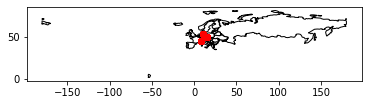

In [32]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red', size=)

plt.show()

In [31]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)